## Observations and Insights 

Type Markdown and LaTeX: 𝛼2𝛼2

Observations:
1. Ramicane is the best treatment to reduce tumor volumes. Capomulin also works well to reduce tumor volumes.
2. Even Ramicane and Capomulin seem to be the best treatments, both drugs were tested close to 100 mice more than any other drugs. This amount of additional testing may have helped to the company improve both treatments.
3. Generally, the weight of the mice is proportional to the volume of the tumor. In order words, the heavier the mice, the more likely the mice will have a higher volume of tumor.
4. One mice of the mice for capomulin had a drastically low tumor volume as an outlier. Maybe it might be worth taking a look as to why the mice had a low tumor volume.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice.
merge_df["Mouse ID"].nunique()

249

In [39]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merge_df['Duplicate test'] =merge_df.duplicated(subset=["Mouse ID","Timepoint"], keep= 'first')
dup_mice = merge_df.loc[merge_df["Duplicate test"] == True]
dup_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicate test
909,g989,Propriva,Female,21,26,0,45.000000,0,True
911,g989,Propriva,Female,21,26,5,47.570392,0,True
913,g989,Propriva,Female,21,26,10,49.880528,0,True
915,g989,Propriva,Female,21,26,15,53.442020,0,True
917,g989,Propriva,Female,21,26,20,54.657650,1,True


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 

Dup_mouse = merge_df.loc[merge_df["Mouse ID"] == "g989", :]
Dup_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [41]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean = merge_df.loc[merge_df["Mouse ID"] != "g989", :]
clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicate test
0,k403,Ramicane,Male,21,16,0,45.000000,0,False
1,k403,Ramicane,Male,21,16,5,38.825898,0,False
2,k403,Ramicane,Male,21,16,10,35.014271,1,False
3,k403,Ramicane,Male,21,16,15,34.223992,1,False
4,k403,Ramicane,Male,21,16,20,32.997729,1,False
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,False
1889,z969,Naftisol,Male,9,30,30,65.841013,3,False
1890,z969,Naftisol,Male,9,30,35,69.176246,4,False
1891,z969,Naftisol,Male,9,30,40,70.314904,4,False


In [42]:
# Checking the number of mice in the clean DataFrame.
clean["Mouse ID"].nunique()


248

## Summary Statistics

In [43]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
summ_mean = clean.groupby(by="Drug Regimen")["Tumor Volume (mm3)"].mean()
summ_Med = clean.groupby(by="Drug Regimen")["Tumor Volume (mm3)"].median()
summ_var= clean.groupby(by="Drug Regimen")["Tumor Volume (mm3)"].var()
summ_std=clean.groupby(by="Drug Regimen")["Tumor Volume (mm3)"].std()
summ_SEM=clean.groupby(by="Drug Regimen")["Tumor Volume (mm3)"].sem()
summ=pd.DataFrame({"Mean":summ_mean,"Median":summ_Med,"Variance":summ_var,"Standard Deviation":summ_std,"SEM":summ_SEM})
summ

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [97]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.
summ_agg = clean.groupby(by="Drug Regimen")["Tumor Volume (mm3)"].aggregate(['mean','median','var','std','sem'])
summ_agg = summ_agg.rename(columns={'mean': "Mean",'median':'Median','var':'Variance','std':'Standard Deviation','sem':'SEM'})
summ_agg



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [44]:
total= clean.groupby(by="Drug Regimen")["Mouse ID"].count()
total

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

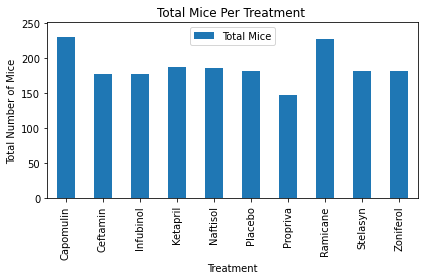

In [302]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
df = pd.DataFrame({"Total Mice": total})
chart=df.plot(kind="bar", title="Total Mice Per Treatment ",rot=90)
chart.set_xlabel("Treatment")
chart.set_ylabel("Total Number of Mice")

plt.ylim(0, 251)
plt.yticks(np.arange(0,251, 50.0))

plt.tight_layout()

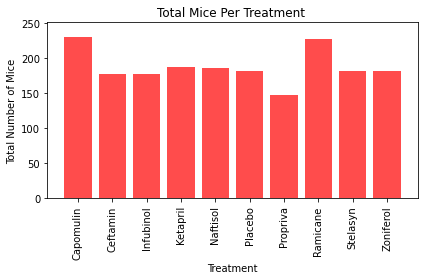

In [303]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
y_axis=total
x_axis=np.arange(len(total))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,total.index.values, rotation="vertical")
plt.bar(x_axis, y_axis, color='r', alpha=0.7, align="center")

plt.title("Total Mice Per Treatment ")
plt.xlabel("Treatment")
plt.ylabel("Total Number of Mice")

plt.ylim(0, 251)
plt.yticks(np.arange(0,251, 50.0))
plt.tight_layout()


In [49]:
#The distribution of female versus male mice
dist_gen =  clean.groupby(['Sex'])

# Create a new variable that holds the sum of our groups
sum_it_up = dist_gen.count()
mice_gen=sum_it_up["Mouse ID"]
gen_keys=mice_gen.keys()

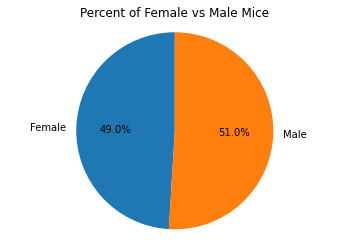

In [308]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender= mice_gen.plot(kind="pie", y=gen_keys, title=("Percent of Female vs Male Mice"),autopct='%1.1f%%', startangle=90)
gender.set_ylabel("")



plt.axis("equal")
plt.show()

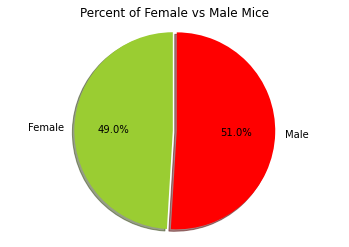

In [315]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
explode = (0, 0.04)
colors = ["yellowgreen", "red"]
plt.title("Percent of Female vs Male Mice")
plt.pie(mice_gen, explode=explode, labels=gen_keys, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [352]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
most_pro = clean.loc[(clean["Drug Regimen"] == "Capomulin")|
                    (clean["Drug Regimen"] == "Ramicane")|
                    (clean["Drug Regimen"] == "Infubinol")|
                    (clean["Drug Regimen"] == "Ceftamin"),:]


# Start by getting the last (greatest) timepoint for each mouse
great_time=most_pro.groupby(['Mouse ID'])["Timepoint"].max()
great_time

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
great_merge_df = pd.merge(great_time, most_pro, on="Timepoint", how="inner")

final_tumor=great_merge_df.groupby(['Mouse ID'])["Tumor Volume (mm3)"].mean()
final_tumor

Mouse ID
a203    63.147145
a251    61.335233
a275    58.729394
a411    39.418659
a444    43.061095
          ...    
y769    63.590364
y793    34.569012
y865    60.721190
z578    33.893481
z581    59.144866
Name: Tumor Volume (mm3), Length: 100, dtype: float64

In [349]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_df= great_merge_df["Drug Regimen"].unique().tolist()
print(treatments_df)
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments_df:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_reg = great_merge_df.loc[great_merge_df["Drug Regimen"]==drug,"Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data.append(drug_reg)
    quartiles = drug_reg.quantile([0.25,0.50,0.75])
    lowerq= quartiles[.25]
    upperq= quartiles[.75]
    iqr=upperq-lowerq
    lower_bound = round(lowerq - (1.5*iqr),1)
    upper_bound = round(upperq + (1.5*iqr),1)
    
    # Determine outliers using upper and lower bounds
    print(f"Values below {lower_bound} and above {upper_bound} could be outliers for drug regimen {drug}.")
    for outlier in drug_reg:
        if outlier < lower_bound or outlier > upper_bound:
            print(f"Outliers for the drug regimen {drug} are {outlier}.")

['Ramicane', 'Capomulin', 'Infubinol', 'Ceftamin']
Values below 19.6 and above 55.3 could be outliers for drug regimen Ramicane.
Values below 23.8 and above 52.3 could be outliers for drug regimen Capomulin.
Outliers for the drug regimen Capomulin are 23.34359787.
Outliers for the drug regimen Capomulin are 23.34359787.
Outliers for the drug regimen Capomulin are 23.34359787.
Outliers for the drug regimen Capomulin are 23.34359787.
Outliers for the drug regimen Capomulin are 23.34359787.
Outliers for the drug regimen Capomulin are 23.34359787.
Outliers for the drug regimen Capomulin are 23.34359787.
Outliers for the drug regimen Capomulin are 23.34359787.
Outliers for the drug regimen Capomulin are 23.34359787.
Outliers for the drug regimen Capomulin are 23.34359787.
Outliers for the drug regimen Capomulin are 23.34359787.
Outliers for the drug regimen Capomulin are 23.34359787.
Outliers for the drug regimen Capomulin are 23.34359787.
Outliers for the drug regimen Capomulin are 23.3435

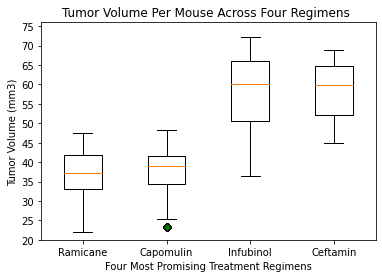

In [350]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
green_diamond = dict(markerfacecolor='g', marker='D')
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume Per Mouse Across Four Regimens ')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Four Most Promising Treatment Regimens')
ax1.boxplot(tumor_vol_data, labels=treatments_df, flierprops=green_diamond)

plt.ylim(20, 76)
plt.yticks(np.arange(20,76, 5.0))

plt.show()

## Line and Scatter Plots

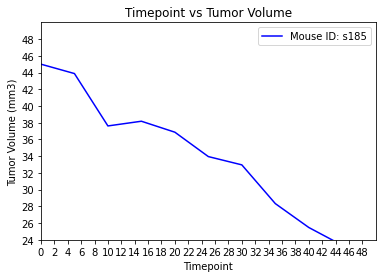

In [286]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

cap =clean.loc[(clean["Drug Regimen"]=="Capomulin") &
                     (clean["Mouse ID"]=="s185")]
timepoint = cap["Timepoint"]
tumor = cap["Tumor Volume (mm3)"]
time_tumor, = plt.plot(timepoint, tumor, color="blue", label="Mouse ID: s185")
plt.legend(handles=[time_tumor], loc="best")

plt.title("Timepoint vs Tumor Volume")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.ylim(24, 50)
plt.xlim(0, 50)
plt.xticks(np.arange(0, 50, 2.0))
plt.yticks(np.arange(24,50, 2.0))
# Show the chart
plt.show()


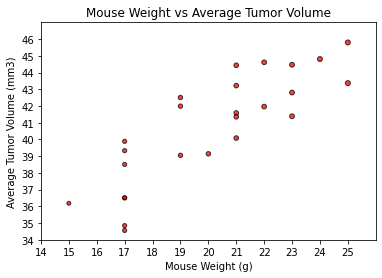

In [307]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap =clean.loc[(clean["Drug Regimen"]=="Capomulin")]
ave_tumor = cap.groupby(by="Mouse ID")["Tumor Volume (mm3)"].mean()
weight=cap.groupby(by="Mouse ID")["Weight (g)"].mean()

plt.scatter(weight, ave_tumor, marker="o", facecolors="red", edgecolors="black", s=weight, alpha=0.75)
plt.title("Mouse Weight vs Average Tumor Volume")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.ylim(34, 47)
plt.xlim(14, 26)
plt.xticks(np.arange(14, 26, 1.0))
plt.yticks(np.arange(34,47, 1.0))

plt.show()

## Correlation and Regression

The correlation between both factors is 0.84


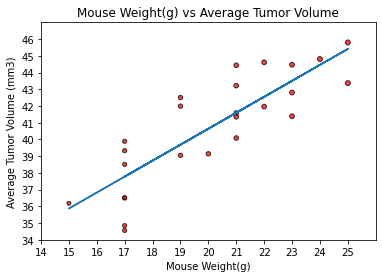

In [285]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
m_slope, m_int, m_r, m_p, m_std_err = st.linregress(weight, ave_tumor)
m_fit = m_slope * weight + m_int
correlation = st.pearsonr(weight, ave_tumor)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.plot(weight,m_fit)
plt.scatter(weight, ave_tumor, marker="o", facecolors="red", edgecolors="black", s=weight, alpha=0.75)
plt.title("Mouse Weight(g) vs Average Tumor Volume")
plt.xlabel("Mouse Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.ylim(34, 47)
plt.xlim(14, 26)
plt.xticks(np.arange(14, 26, 1.0))
plt.yticks(np.arange(34,47, 1.0))

plt.show()